## Problem A - Build a model to predict the value of the question in the TV game show “Jeopardy!”. 
## - By Gagan Purad -> gagansp9964@gmail.com

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
#Read the data
data = pd.read_csv("JEOPARDY_CSV.csv")
data.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [3]:
data.info()   # Let's check the basic info the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [4]:
# Renaming Columns to remove trailing whitespace and convert them to lowercase
data.columns = [x.strip().lower() for x in data.columns]
data.head()

,show number,air date,round,category,value,question,answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


###  Let's check the distribution of question per round

In [5]:
#pip install wordcloud

In [6]:
from wordcloud import WordCloud
import matplotlib.colors as matcolors

In [7]:
# Lets write a function to check the distribution

def dist_ques_round(data,title,xlabel,ylabel):
    x_pos = np.arange(len(data.keys()))
    plt.figure(figsize=[12,8])
    plt.bar(x_pos, data.values(), color = "red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xticks(x_pos, data.keys())
    
    plt.show()

###  Distribution of the Questions accross the Rounds, Since rounds Final Jeopardy and tiebraker rounds got the less number of questions compared to others,and the value is None they're ignored for the further purpose

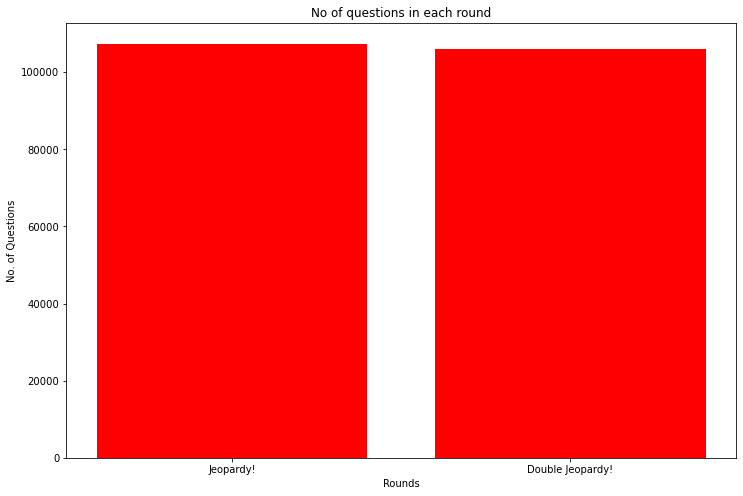

In [13]:
dist_ques_round(data['round'].value_counts().to_dict(),'No of questions in each round','Rounds','No. of Questions')

### For further progress let's convert 'value' from object to int datatype

In [14]:
# Let's write a function for conversion process

def convert_value(value):
    value = value.strip('$')
    value = ''.join(value.split(','))
    return int(value)

def convert_bins(value):    
    if value < 1000:
        return np.round(value,-2)
    elif value < 10000:
        return np.round(value, -3)
    else:
        return np.round(value, -4)

In [15]:
data.drop(data[data['value'] == "None"].index, inplace= True)

In [16]:
data['value_num'] = data['value'].apply(convert_value)
data.value_num.nunique()

145

In [17]:
data['value_bins'] = data['value_num'].apply(convert_bins)
data.value_bins.nunique()

21

In [18]:
data.head()

,show number,air date,round,category,value,question,answer,value_num,value_bins
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200,200


In [19]:
data.tail()

,show number,air date,round,category,value,question,answer,value_num,value_bins
216924,4999,2006-05-11,Double Jeopardy!,OFF-BROADWAY,$2000,In 2006 the cast of this long-running hit emba...,Stomp,2000,2000
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot,2000,2000
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse,2000,2000
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,2000,2000
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,2000,2000


### Now let's work on the Questions column to clean it

In [20]:
#pip install nltk

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [22]:
stop_word = set(stopwords.words('english'))
porter_stemmer = PorterStemmer()

In [23]:
def question_preprocessing(question):
    question = question.lower()
    question = re.sub("[^a-z A-Z]", ' ', question)
    question = " ".join([porter_stemmer.stem(word) for word in question.split(' ') if not word in stop_word and word != ''])
    return question

In [24]:
questions_processed = data['question'].apply(question_preprocessing)

In [25]:
questions_processed.head()

0    last year life galileo hous arrest espous man ...
1    olympian footbal star carlisl indian school ml...
2      citi yuma state record averag hour sunshin year
3    live art linklett show compani serv billionth ...
4    signer dec indep framer constitut mass second ...
Name: question, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
apply_tfidf = TfidfVectorizer()

In [27]:
X = apply_tfidf.fit_transform(questions_processed)
y = data.value_bins

In [28]:
X.shape   # Check the shape of X after applying TfidVectorizer (CSR format)

(213296, 62464)

In [29]:
y.shape

(213296,)

### LEt's check the Classes/Bins distibution

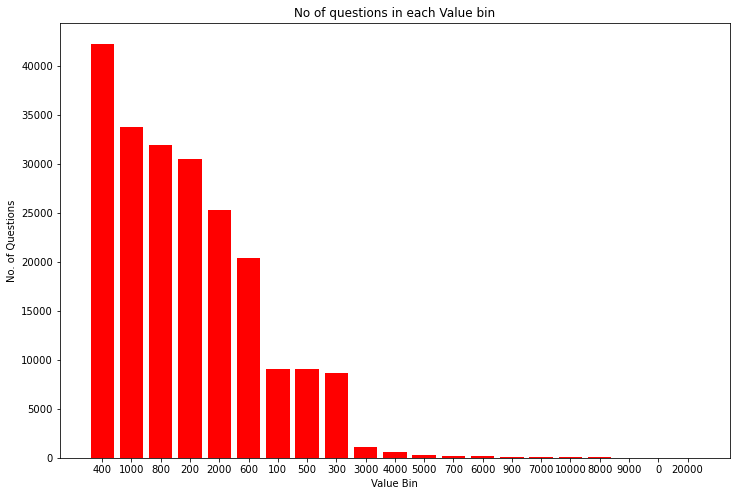

In [30]:
dist_ques_round(data['value_bins'].value_counts().to_dict(),'No of questions in each Value bin','Value Bin','No. of Questions')

In [27]:
# Now let's calculate weights for classes

class_weight = data.value_bins.value_counts().to_dict()
print(class_weight)

{400: 42247, 1000: 33789, 800: 31865, 200: 30460, 2000: 25232, 600: 20379, 100: 9029, 500: 9016, 300: 8663, 3000: 1077, 4000: 585, 5000: 322, 700: 203, 6000: 138, 900: 114, 7000: 60, 10000: 45, 8000: 43, 9000: 15, 0: 12, 20000: 2}


## Let's apply the very famous boosting algorithm XGBoost

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [33]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [35]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [36]:
xg_reg.fit(X_train,y_train)

[19:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [37]:
preds = xg_reg.predict(X_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 709.279004


In [50]:
# We have got an RMSE value of 709.2 let's try to reduce it by using K-fold

### k-fold Cross Validation using XGBoost

In [39]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [40]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[19:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [41]:
cv_results.head()  # train and test RMSE metrics for each boosting round.

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,953.886922,3.104036,954.102804,6.455076
1,905.117431,2.889391,905.573425,6.908033
2,863.487610,3.044189,864.215169,6.859294
3,828.176290,2.956204,829.171224,7.044673
4,798.430216,3.194335,799.653137,6.923704


## Extract and print the final boosting round metric.

In [42]:
print((cv_results["test-rmse-mean"]).tail(1))

49    656.710551
Name: test-rmse-mean, dtype: float64


##  We can see from above results that RMSE has reduced to 656.71 from 709.2

In [43]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[19:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


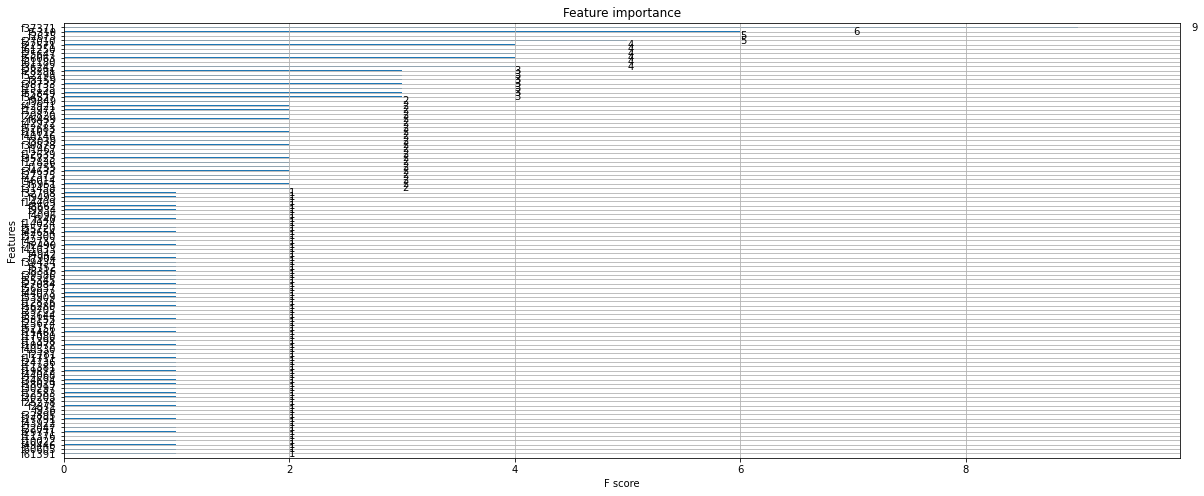

In [49]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()